## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
#CODE

dataset = pd.read_csv("titanic.csv")

# dataset.describe()

# print(dataset.shape)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [3]:
#CODE

missing_values = dataset.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



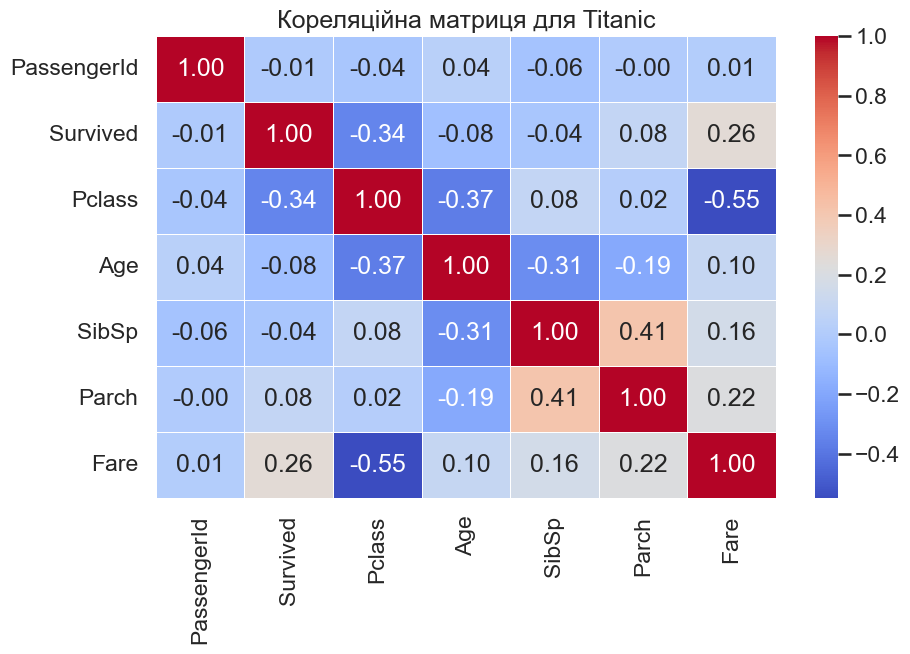

In [9]:
df = pd.read_csv("titanic.csv")
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Кореляційна матриця для Titanic')
plt.show()


Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [5]:
#CODE

def fill_missing_values(df, column, groups):
    df[column] = df.groupby(groups)[column].transform(lambda x: x.fillna(x.median()))
    return df

filled_df = fill_missing_values(dataset, 'Age', ['Pclass', 'Sex'])
missing_values = filled_df.isnull().sum()

filled_df.head()

missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\dsada\AppData\Local\Temp\ipykernel_11324\2344997337.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age_bin = filled_df.groupby('Age_bin')['Survived'].sum()


<Axes: xlabel='Age_bin'>

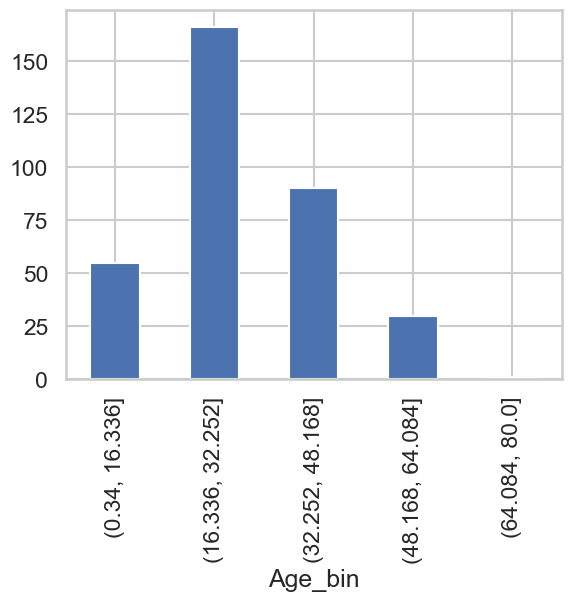

In [10]:
#CODE

age_bins = pd.cut(filled_df['Age'], 5)

filled_df['Age_bin'] = age_bins

survived_by_age_bin = filled_df.groupby('Age_bin')['Survived'].sum()

survived_by_age_bin.plot(kind='bar')


Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

C:\Users\volod\AppData\Local\Temp\ipykernel_24828\1312847450.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_fare_bin = filled_df.groupby('Fare_bin')['Survived'].sum()


<Axes: xlabel='Fare_bin'>

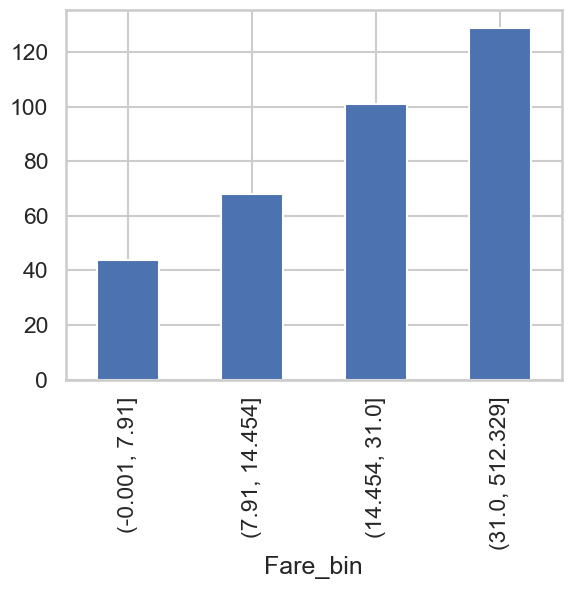

In [ ]:
#CODE

filled_df['Fare_bin'] = pd.qcut(filled_df['Fare'], 4)

survived_by_fare_bin = filled_df.groupby('Fare_bin')['Survived'].sum()

survived_by_fare_bin.plot(kind='bar')


Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [ ]:
#CODE

filled_df['Family_size'] = filled_df['Parch'] + filled_df['SibSp']
filled_df['Alone'] = filled_df['Family_size'].apply(lambda x: 1 if x == 0 else 0)


final_df = filled_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'Parch', 'SibSp', 'Fare_bin'], axis=1)

final_df.head()


,Survived,Pclass,Sex,Embarked,Age_bin,Family_size,Alone
0,0,3,male,S,"(16.336, 32.252]",1,0
1,1,1,female,C,"(32.252, 48.168]",1,0
2,1,3,female,S,"(16.336, 32.252]",0,1
3,1,1,female,S,"(32.252, 48.168]",1,0
4,0,3,male,S,"(32.252, 48.168]",0,1


Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [ ]:
#CODE

missing_threshold = 0.4
missing_ratios = dataset.isnull().sum() / len(dataset)
columns_to_drop = missing_ratios[missing_ratios > missing_threshold].index.tolist()
columns_to_drop += ['PassengerId', 'Name', 'Ticket', 'Cabin']
dataset.drop(columns=columns_to_drop, inplace=True, errors='ignore')

Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


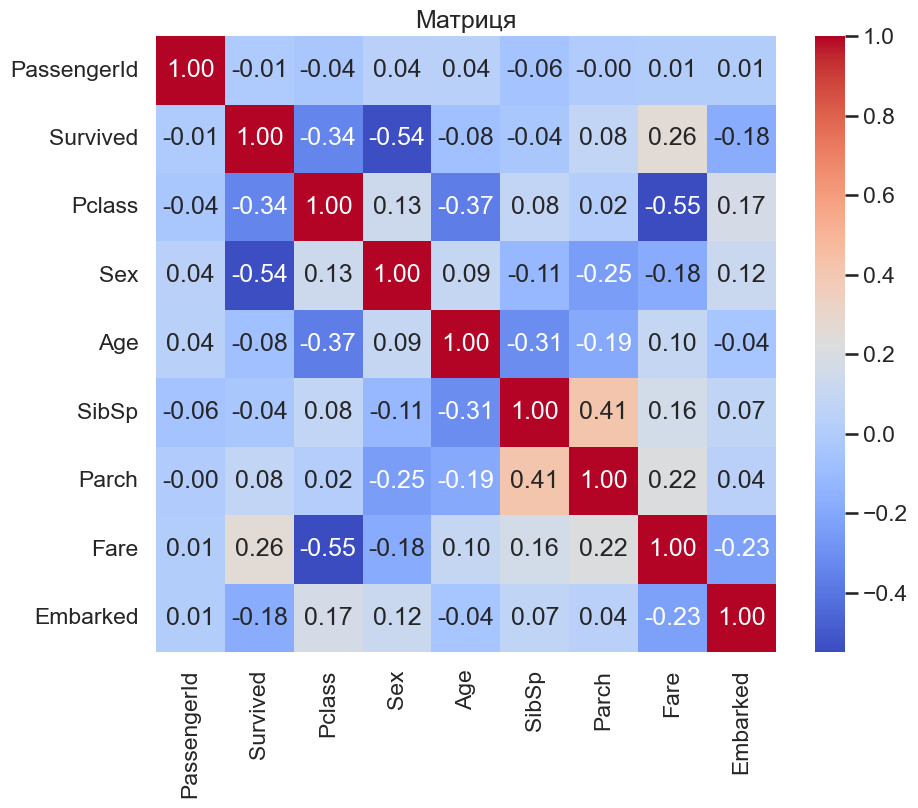

In [15]:
dataset = pd.read_csv("titanic.csv")

dataset['Sex'] = dataset['Sex'].astype('category').cat.codes
dataset['Embarked'] = dataset['Embarked'].astype('category').cat.codes
# dataset['Title'] = dataset['Title'].astype('category').cat.codes

numeric_dataset = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataset.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця")
plt.show()

Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



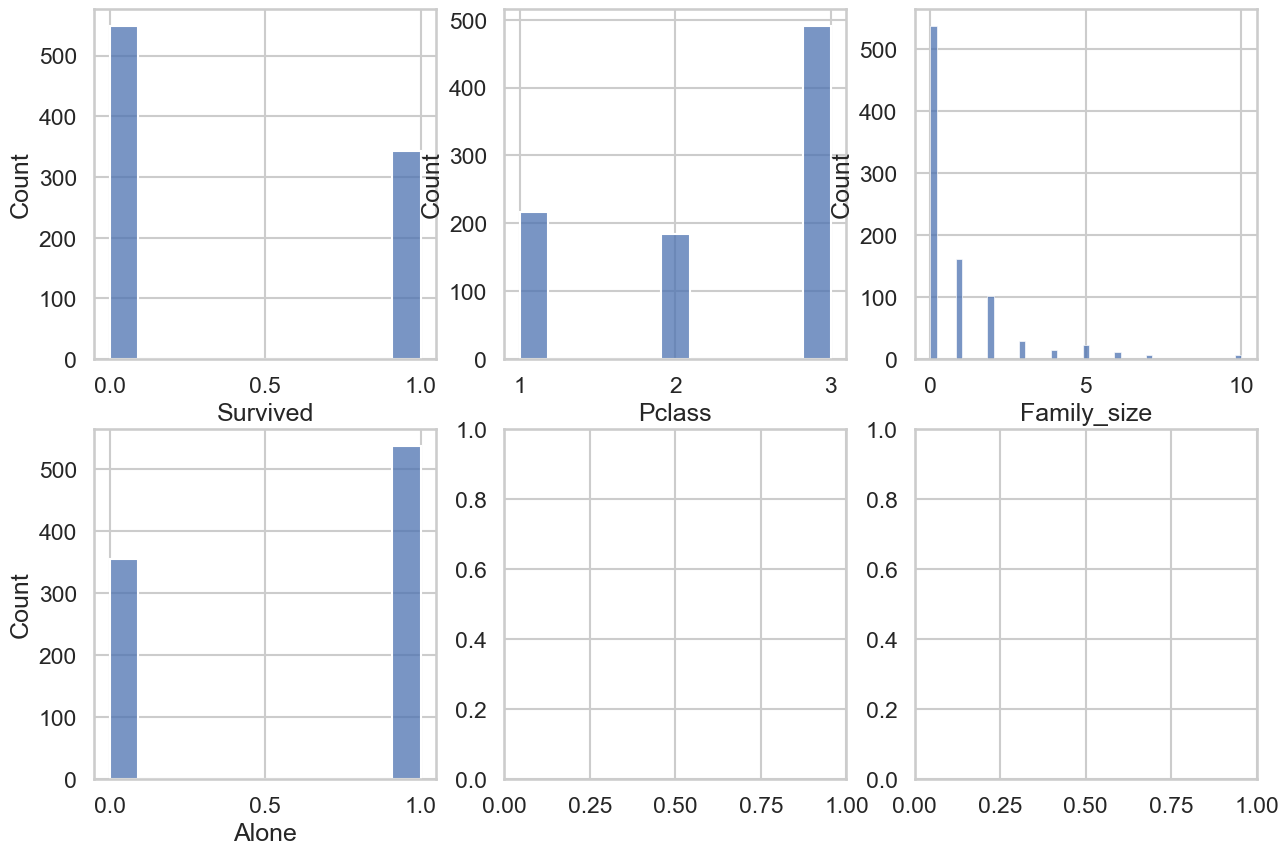

In [ ]:
#code

numerical_features = final_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(data=final_df, x=feature, ax=axes[i//3, i%3])

Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

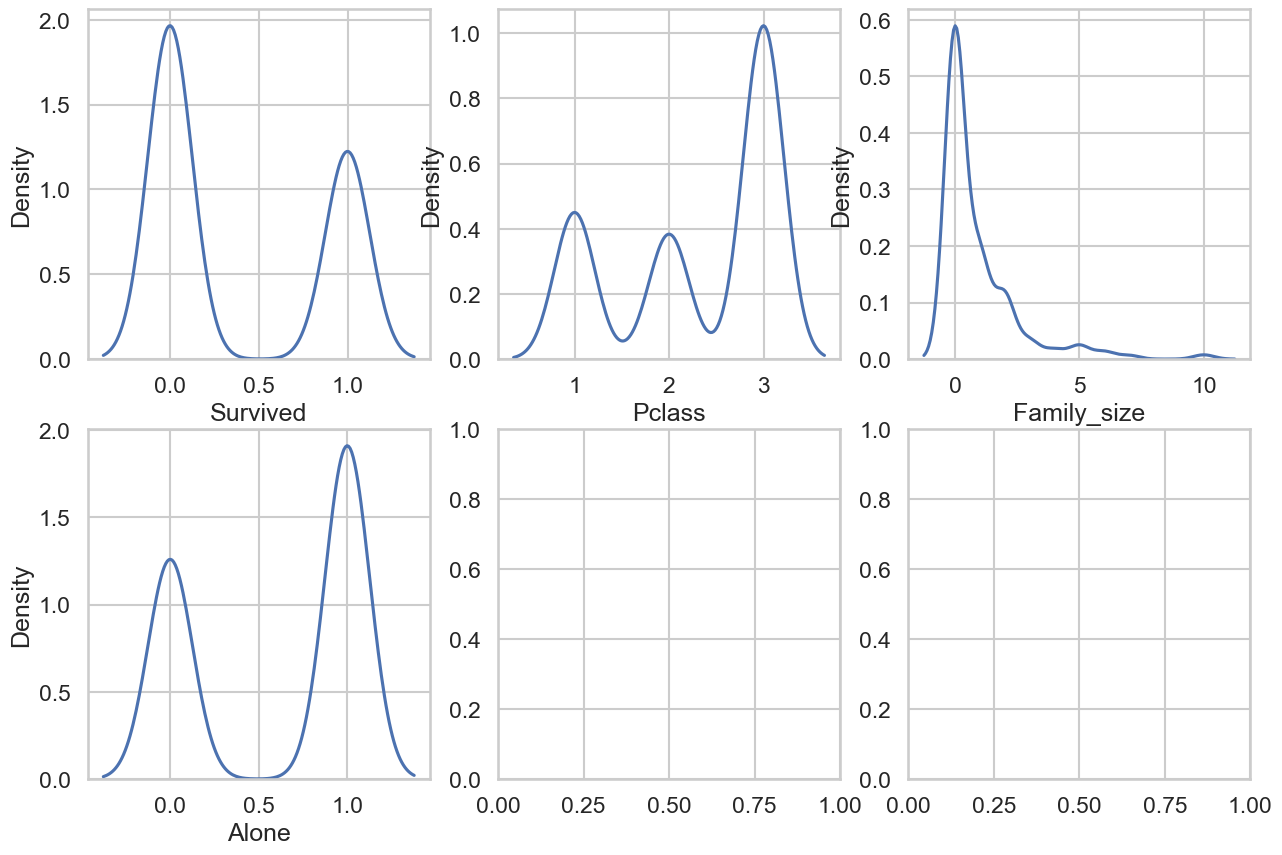

In [ ]:
#code

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=final_df, x=feature, ax=axes[i//3, i%3])

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

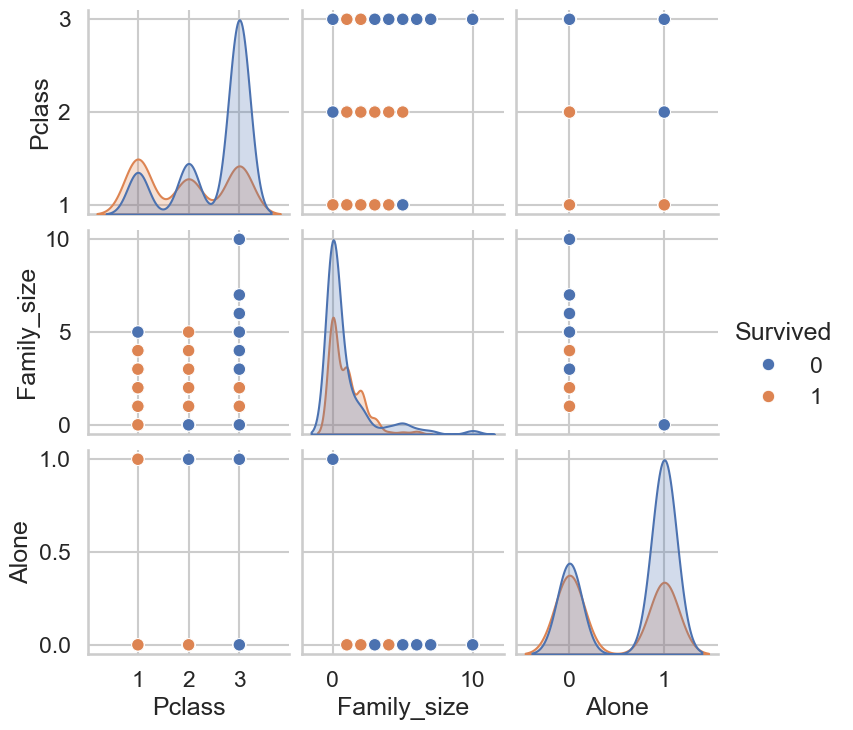

In [ ]:
#code

sns.pairplot(data=final_df, hue='Survived')



Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.